In [1]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("customers Data:")
display(customers.head())

print("\nproduct Data:")
display(products.head())

print("\ntransactions.head")
display(transactions.head())



customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



product Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



transactions.head


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [2]:
print("\nMissing Values:")

print("Customers:")
print(customers.isnull().sum())

print("\nProducts:")
print(products.isnull().sum())

print("\nTransactions:")
print(transactions.isnull().sum())

print("\nDuplicate Records:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

print("\nTransaction Summary Statistics:")
print(transactions.describe())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Records:
Customers: 0
Products: 0
Transactions: 0

Transaction Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


C:\Users\sanka\AppData\Local\Temp\ipykernel_13728\674204650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


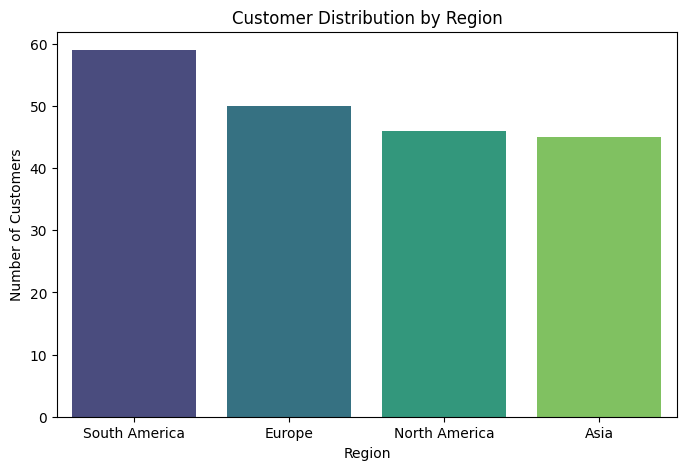

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

region_counts = customers['Region'].value_counts()
plt.figure(figsize = (8,5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()
plt.savefig("Distribution by Region.jpg")

C:\Users\sanka\AppData\Local\Temp\ipykernel_13728\1387508242.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'ProductName', y = 'TotalValue', data = top_products, palette = 'magma')


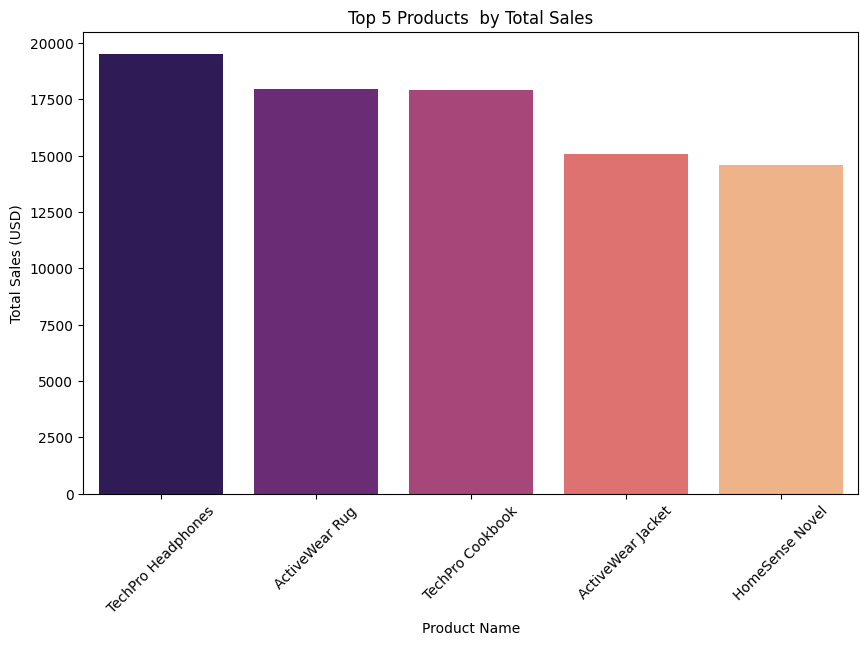

In [4]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_products = top_products.reset_index().merge(products[['ProductID', 'ProductName']], on ='ProductID')

plt.figure(figsize = (10, 6))
sns.barplot(x = 'ProductName', y = 'TotalValue', data = top_products, palette = 'magma')
plt.title('Top 5 Products  by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation = 45)
plt.show()

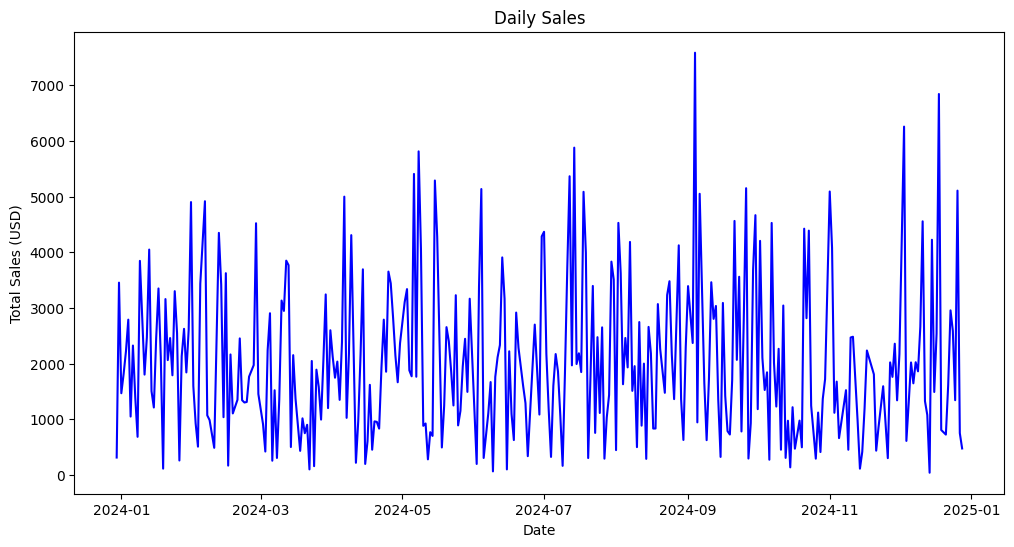

In [7]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()

plt.figure(figsize = (12, 6))
daily_sales.plot(color = 'blue')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.show()